In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:08<00:00, 78.9MB/s]
100% 1.06G/1.06G [00:08<00:00, 138MB/s] 


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout


In [9]:
#generators
train_ds = keras.utils.image_dataset_from_directory (
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory (
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
#Normalize

def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [23]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid', activation ='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid', activation ='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid', activation ='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_1 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                      

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)


Epoch 1/10
625/625 [==============================] - 68s 103ms/step - loss: 0.6564 - accuracy: 0.6083 - val_loss: 0.6873 - val_accuracy: 0.5986
Epoch 2/10
625/625 [==============================] - 64s 101ms/step - loss: 0.5705 - accuracy: 0.7016 - val_loss: 0.5689 - val_accuracy: 0.7062
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4727 - accuracy: 0.7759 - val_loss: 0.5110 - val_accuracy: 0.7428
Epoch 4/10
625/625 [==============================] - 65s 102ms/step - loss: 0.3328 - accuracy: 0.8575 - val_loss: 0.6094 - val_accuracy: 0.7174
Epoch 5/10
625/625 [==============================] - 60s 95ms/step - loss: 0.1812 - accuracy: 0.9282 - val_loss: 0.7331 - val_accuracy: 0.7538
Epoch 6/10
625/625 [==============================] - 74s 118ms/step - loss: 0.0992 - accuracy: 0.9650 - val_loss: 0.7952 - val_accuracy: 0.7644
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.0727 - accuracy: 0.9750 - val_loss: 0.8222 - val_acc

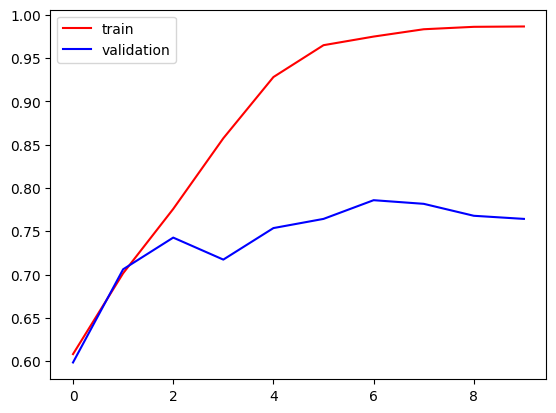

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color ='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

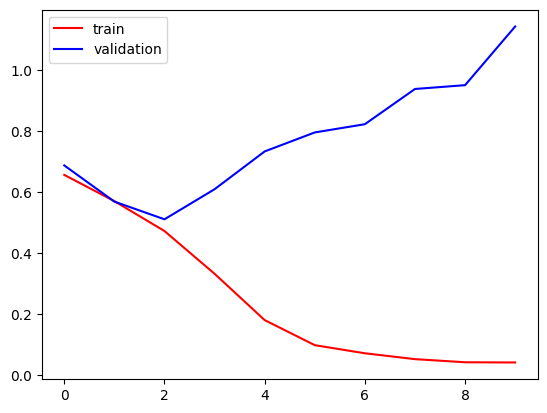

In [29]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [30]:
import cv2

In [39]:
test_img = cv2.imread('/content/cat.jpeg')

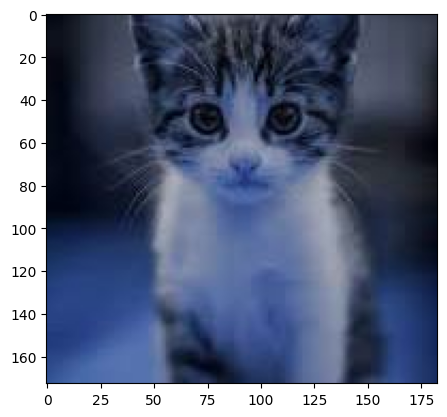

In [40]:
plt.imshow(test_img)

In [41]:
test_img.shape

(173, 183, 3)

In [42]:
test_img = cv2.resize(test_img,(256,256))

In [43]:
test_input = test_img.reshape((1,256,256,3))

In [44]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)